In [9]:
import pandas as pd #load module for data manipulation

In [10]:
import csv

def tab_delimited_to_dict(filename):
    data_dict = {}
    
    with open(filename, 'r', newline='') as file:
        reader = csv.DictReader(file, delimiter='\t')
        
        for row in reader:
            for key, value in row.items():
                if key not in data_dict:
                    data_dict[key] = [value]
                else:
                    data_dict[key].append(value)

    return data_dict

# Provide the path to your tab-delimited text file as the argument
input_file1 = r"C:\Users\HP\OneDrive\Desktop\New folder (2)\top15pvalues.txt"
input_file2 = r"C:\Users\HP\OneDrive\Desktop\New folder (2)\Top15tscores.txt"
result1 = tab_delimited_to_dict(input_file1)
result2 = tab_delimited_to_dict(input_file2)
result2
result1 = {
    key: [float(value) for value in values] for key, values in result1.items()
}

result2 = {
    key: [float(value) for value in values] for key, values in result2.items()
}


In [11]:
# # Function to convert a tab-delimited text document to a single list
# def convert_tab_delimited_to_list(file_path):
#     data_list = []
#     with open(file_path, 'r') as file:
#         for line in file:
#             # Split each line using tab character as a delimiter
#             elements = line.strip().split('\t')
#             # Extend the data_list with elements from the current line
#             data_list.extend(elements)
#     return data_list

# # Replace 'your_file.txt' with the path to your tab-delimited text document
# file_path = r"C:\Users\HP\OneDrive\Desktop\New folder (2)\negpanelgenes.txt"
# result_list = convert_tab_delimited_to_list(file_path)

# # # Print the resulting list
# # print(result_list)


In [12]:
pval_data = result1
# list_of_items = ['CENPQ','CENPI','EXO1','C1orf112','TCL1A','FAM47C','CR2','SLC5A10','PRH1-PRR4','LINC01500','GAB3','LINC00462','PLXDC1','HKR1','LOC116143']
list_of_items = ['CENPI','EXO1','NRAP','GALNT16','TMEM62','WNT16','MGC61571','CERCAM','ODF3L2','GATAD2A','CASD1','CACNG7','LOC728743','HPSE2','ZNF91']
pval_df = pd.DataFrame(data = pval_data)
pval_df = pd.concat([pd.Series(list_of_items, name='Items'), pval_df], axis = 1)
print(pval_df.head(5))

     Items  CIN3vsnormal(1ID)  CIN3vsnormal(2ID)  CIN3vsnormal(Verification)  \
0    CENPI           0.000795       3.920000e-06                2.810000e-08   
1     EXO1           0.001671       8.240000e-10                1.140000e-09   
2     NRAP           0.004764       5.470000e-12                8.660000e-09   
3  GALNT16           0.005145       1.310000e-13                2.370000e-08   
4   TMEM62           0.010390       2.050000e-14                2.220000e-08   

   GSE63514CCvsnormal  CIN1vsnormal  CIN2vsnormal  GSE6791CCvsnormal  
0        2.160000e-14      0.015780      0.000087       2.090000e-07  
1        5.590000e-11      0.132593      0.000013       5.168670e-04  
2        1.390000e-10      0.040473      0.038503       4.460000e-08  
3        7.130000e-11      0.051549      0.050044       2.050000e-06  
4        2.150000e-09      0.037119      0.032117       1.730000e-06  


In [13]:
from scipy import stats #module for Stouffer's z-score method combined p-value calculation
import numpy as np #module to save data to file

In [14]:
#performs Stouffer's z-score method combined p-value calculation on pval_df
item_array = []
results_zscore_array = []
results_pvalue_array = []
results_total_array = []

for row_num, row_data in pval_df.iterrows():
    temp_y = list(pval_df.iloc[row_num])
    item = temp_y[0]
    temp_y.pop(0)
    combo_Zscore, combo_pvalue = stats.combine_pvalues(pvalues = temp_y, method = 'stouffer')
    combo_Zscore = (round(combo_Zscore, 1))
    combo_pvalue = format(combo_pvalue, '.2e')
    
    print(str(item) + ': Stouffers z-score is ' + str(combo_Zscore))
    print(str(item) + ': Combined p-value ' + str(combo_pvalue))
    print()
    
    item_array.append(item)
    results_zscore_array.append(combo_Zscore)
    results_pvalue_array.append(combo_pvalue)
    total = str(combo_Zscore) + ' (' + str(combo_pvalue) + ')'
    results_total_array.append(total)
    
#combine and save data to file
df_to_save = pd.DataFrame(np.column_stack([results_zscore_array, results_pvalue_array]),
                          columns=['Stouffers z-score', 'Combined p-value'],
                          index=item_array)
df_to_save.to_csv("results.txt", sep ='\t', index=True)

CENPI: Stouffers z-score is 11.9
CENPI: Combined p-value 3.97e-33

EXO1: Stouffers z-score is 11.3
EXO1: Combined p-value 4.46e-30

NRAP: Stouffers z-score is 11.4
NRAP: Combined p-value 1.81e-30

GALNT16: Stouffers z-score is 11.2
GALNT16: Combined p-value 2.03e-29

TMEM62: Stouffers z-score is 11.1
TMEM62: Combined p-value 3.71e-29

WNT16: Stouffers z-score is 10.8
WNT16: Combined p-value 1.86e-27

MGC61571: Stouffers z-score is 10.7
MGC61571: Combined p-value 5.57e-27

CERCAM: Stouffers z-score is 10.7
CERCAM: Combined p-value 4.96e-27

ODF3L2: Stouffers z-score is 10.6
ODF3L2: Combined p-value 9.39e-27

GATAD2A: Stouffers z-score is 10.6
GATAD2A: Combined p-value 1.22e-26

CASD1: Stouffers z-score is 10.6
CASD1: Combined p-value 1.98e-26

CACNG7: Stouffers z-score is 10.6
CACNG7: Combined p-value 1.03e-26

LOC728743: Stouffers z-score is 10.5
LOC728743: Combined p-value 5.60e-26

HPSE2: Stouffers z-score is 10.5
HPSE2: Combined p-value 3.84e-26

ZNF91: Stouffers z-score is 10.4
ZNF

In [15]:
len(df_to_save)

15

In [16]:
Tscore_data = result2
Tscore_df = pd.DataFrame(data = Tscore_data, index = list_of_items)
print(Tscore_df.head(5))

         CIN3vsnormal(1ID)  CIN3vsnormal(2ID)  CIN3vsnormal(Verification)  \
CENPI             0.360502           0.259492                    0.276790   
EXO1              1.309525           1.230410                    1.311853   
NRAP             -1.099696          -1.245450                   -1.004892   
GALNT16          -0.991178          -1.010372                   -0.791731   
TMEM62           -0.481801          -0.339255                   -0.335154   

         GSE63514CCvsnormal  CIN1vsnormal  CIN2vsnormal  GSE6791CCvsnormal  
CENPI              0.424052      0.335555      0.210589           0.687204  
EXO1               1.797599      1.264544      0.934083           3.007135  
NRAP              -1.723288     -1.132152     -1.641344          -2.640810  
GALNT16           -1.455835     -0.929790     -1.280529          -2.255472  
TMEM62            -0.513198     -0.428812     -0.329412          -0.843416  


In [17]:
#convert pval_df from pval floats to * string significance markers for p<0.05 for heatmap annotation
pval_df.drop(columns=pval_df.columns[0], axis=1, inplace=True)
studies = list(pval_df)

temp_value = ''
for col in pval_df:
    pval_df.loc[pval_df[col] < 0.05, col] = "o"
    pval_df.loc[pval_df[col] != "o", col] = " "

In [18]:
import math

#set color bar range
maxValues = Tscore_df.max()
highest_Tscore = max(maxValues)
minValues = Tscore_df.min()
lowest_Tscore = min(minValues)

if highest_Tscore > abs(lowest_Tscore):
    cmap_set_point = highest_Tscore
else:
    cmap_set_point = abs(lowest_Tscore)
cmap_set_point = math.ceil(cmap_set_point)

In [19]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.lines as mlines

# # Sample data
# # Tscore_df = ...
# # item_array = ...
# # results_total_array = ...
  
# sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor': 'white'})

# fig, ax = plt.subplots(figsize=(40, 40))
# ax.set_xlabel('Signatures', color='black')

# ax = sns.heatmap(Tscore_df, cbar=False)
# ax.set_yticklabels(labels=item_array, rotation=0)

# ax2 = ax.twinx()

# # Customize the number of FixedLocator locations for x-axis
# num_fixed_locator_locations_x = 7  # Change this to the desired number
# ax.xaxis.set_major_locator(plt.FixedLocator(range(num_fixed_locator_locations_x)))

# ax2 = sns.heatmap(Tscore_df, linewidth=5,
#                  cmap='BrBG', fmt='s', center=0, cbar_kws={'shrink': 0.8, 'label': 'T-score', 'location': "top"},
#                  annot=pval_df,
#                  annot_kws={'fontsize': 24, 'fontstyle': 'normal', 'color': 'black',
#                             'rotation': 'horizontal', "va": 'center'})

# # Customize the number of FixedLocator locations for y-axis
# num_fixed_locator_locations_y = 156  # Change this to the desired number
# ax2.yaxis.set_major_locator(plt.FixedLocator(range(num_fixed_locator_locations_y)))

# ax.set_yticklabels(labels=results_total_array, rotation=0)
# ax.set_xlabel('Signatures', color='black')
# ax2.set_ylabel('Stouffers z-score (combined p-value)', color='black')

# legend_star = mlines.Line2D([], [], color='black', linestyle="None", markeredgewidth=2, fillstyle="none", marker='o', label='p-value<0.05')
# plt.legend(handles=[legend_star], markerscale=2, bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)

# plt.tight_layout()
# fig = ax.get_figure()
# fig.savefig("StouffersHeatMap.jpg", format='jpg', dpi=300)


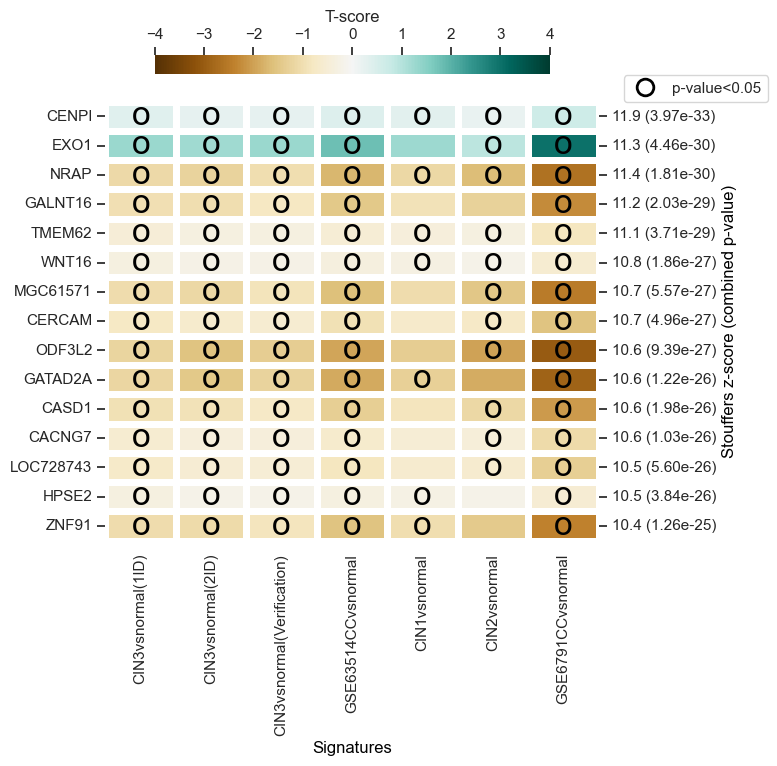

In [20]:
## load modules for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}) #sets up white background for heat map

fig, ax = plt.subplots(figsize = (8,8))
ax.set_xlabel('Signatures', color = 'black')

ax = sns.heatmap(Tscore_df, cbar=False)
ax.set_yticklabels(labels=item_array, rotation=0)

    
ax2 = ax.twinx()

ax2 = sns.heatmap(Tscore_df, linewidth = 5,
                 cmap = 'BrBG', fmt = 's', center = 0, cbar_kws = {'shrink': 0.8, 'label': 'T-score', 'location':"top"},
                 vmin = (-1*cmap_set_point), vmax = cmap_set_point, 
                 annot=pval_df,
                 annot_kws={'fontsize': 24, 'fontstyle': 'normal', 'color':'black',
                       'rotation': 'horizontal', "va": 'center'})

ax2.set_yticklabels(labels=results_total_array, rotation=0)
ax.set_xlabel('Signatures', color = 'black')
ax2.set_ylabel('Stouffers z-score (combined p-value)', color = 'black')

legend_star = mlines.Line2D([], [], color='black', linestyle="None", markeredgewidth=2, fillstyle="none", marker='o', label='p-value<0.05')
plt.legend(handles=[legend_star], markerscale=2, bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)

plt.tight_layout()
fig = ax.get_figure()
fig.savefig("StouffersHeatMap.jpg", format = 'jpg', dpi = 300)